## Домашнее задание

#### 1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [3]:
iris = load_iris()

In [4]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['variety'] = iris.target

In [5]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


#### 2. Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety

In [6]:
data = data[['sepal length (cm)' , 'sepal width (cm)', 'variety']]
data.head()

,sepal length (cm),sepal width (cm),variety
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


In [73]:
# так как классов - три, то нужно две дискриминантные функций. Для этого уберем из датасета сначала класс 0, а затем 1.
data_1_2 = data[data['variety'] != 0]
data_0_2 = data[data['variety'] != 1]

#### 3. Разделите данные на выборку для обучения и тестирования

In [7]:
from sklearn.model_selection import train_test_split

In [91]:
X_train_1_2, X_test_1_2, y_train_1_2, y_test_1_2 = train_test_split(data_1_2[['sepal length (cm)' , 'sepal width (cm)']], data_1_2['variety'], test_size=0.35)
X_train_0_2, X_test_0_2, y_train_0_2, y_test_0_2 = train_test_split(data_0_2[['sepal length (cm)' , 'sepal width (cm)']], data_0_2['variety'], test_size=0.35)

#### 4. Постройте модель LDA

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#### Построим модель для классов 1 и 2

In [84]:
lda_1_2 = LinearDiscriminantAnalysis()

In [92]:
lda_1_2.fit(X_train_1_2, y_train_1_2)

LinearDiscriminantAnalysis()

In [93]:
y_pred_1_2 = lda_1_2.predict(X_test_1_2)
y_pred_1_2

array([2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1])

In [87]:
type(y_test_1_2)

pandas.core.series.Series

In [80]:
type(y_test_1_2.values)

numpy.ndarray

In [94]:
result = pd.DataFrame([y_test_1_2.values, y_pred_1_2]).T
result

,0,1
0,2,2
1,1,2
2,1,1
3,2,2
4,2,2
5,2,1
6,2,2
7,1,1
8,1,2
9,2,2


In [37]:
from sklearn.metrics import accuracy_score

In [95]:
accuracy_score(y_test_1_2, y_pred_1_2)

0.7142857142857143

#### Построим модель для классов 0 и 2

In [96]:
lda_0_2 = LinearDiscriminantAnalysis()

In [97]:
lda_0_2.fit(X_train_0_2, y_train_0_2)

LinearDiscriminantAnalysis()

In [98]:
y_pred_0_2 = lda_0_2.predict(X_test_0_2)
y_pred_0_2

array([2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2,
       0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0])

In [99]:
result = pd.DataFrame([y_test_0_2.values, y_pred_0_2]).T
result

,0,1
0,2,2
1,2,2
2,2,2
3,0,0
4,0,0
5,2,2
6,0,0
7,0,0
8,0,0
9,2,2


In [100]:
accuracy_score(y_test_0_2, y_pred_0_2)

1.0

#### 5. Визуализируйте предсказания для тестовой выборки и центры классов

In [101]:
lda_1_2.means_

array([[5.99310345, 2.81034483],
       [6.62222222, 3.01111111]])

In [103]:
lda_0_2.means_

array([[4.978125  , 3.425     ],
       [6.55757576, 2.96666667]])

#### Предсказания для тестовой выборки для 0 и 2 классов

In [106]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

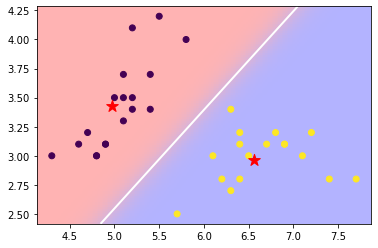

In [107]:
plt.scatter(X_test_0_2['sepal length (cm)'], X_test_0_2['sepal width (cm)'], c=y_pred_0_2)
plt.scatter(lda_0_2.means_[:, 0], lda_0_2.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda_0_2.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1)

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

#### Фактические значения целевой переменной для учебной выборки для 0 и 2 классов

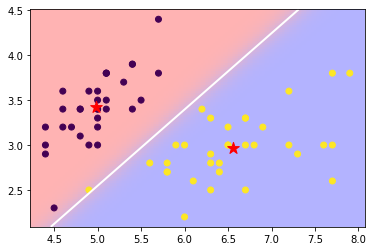

In [108]:
plt.scatter(X_train_0_2['sepal length (cm)'], X_train_0_2['sepal width (cm)'], c=y_train_0_2)
plt.scatter(lda_0_2.means_[:, 0], lda_0_2.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda_0_2.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1)

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

#### Предсказания для тестовой выборки для 1 и 2 классов

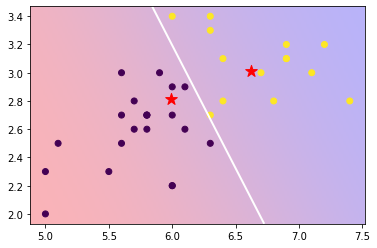

In [109]:
plt.scatter(X_test_1_2['sepal length (cm)'], X_test_1_2['sepal width (cm)'], c=y_pred_1_2)
plt.scatter(lda_1_2.means_[:, 0], lda_1_2.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda_1_2.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1)

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

#### Фактические значения целевой переменной для учебной выборки для 1 и 2 классов

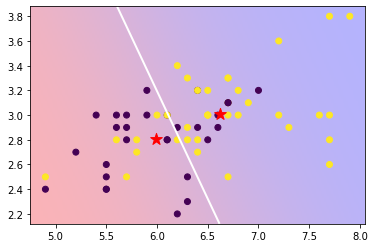

In [110]:
plt.scatter(X_train_1_2['sepal length (cm)'], X_train_1_2['sepal width (cm)'], c=y_train_1_2)
plt.scatter(lda_1_2.means_[:, 0], lda_1_2.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda_1_2.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1)

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

#### 6. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width

In [7]:
data_cluster = data[['sepal length (cm)' , 'sepal width (cm)']]

#### 7. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [8]:
from sklearn.cluster import KMeans

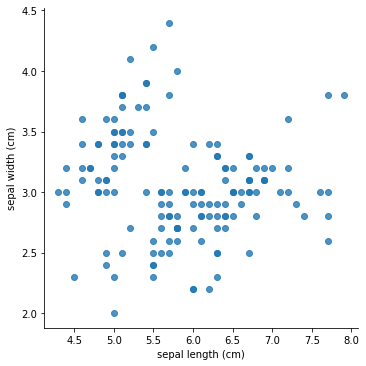

In [13]:
import seaborn as sns
sns.lmplot( x='sepal length (cm)', y='sepal width (cm)', data=data_cluster, fit_reg=False)

In [116]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(2, 10)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(data_cluster)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

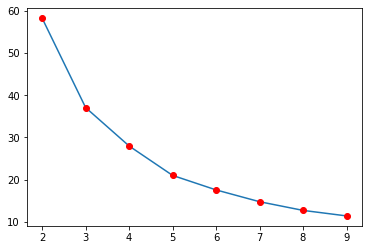

In [117]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

По графику локоть приблизительно находится в районе 5 кластеров

In [14]:
# явно указываем количество кластеров 
kmeans = KMeans(n_clusters=5)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(data_cluster)
clusters

array([1, 4, 4, 4, 1, 1, 4, 1, 4, 4, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 1, 1, 4, 4, 1, 1, 4, 1, 1, 4, 4, 1,
       1, 4, 1, 4, 1, 1, 2, 2, 2, 3, 2, 3, 2, 4, 2, 4, 4, 3, 3, 3, 3, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3,
       3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 4, 3, 2, 3, 0, 2, 2, 0, 4, 0, 2, 0,
       2, 2, 2, 3, 3, 2, 2, 0, 0, 3, 2, 3, 0, 3, 2, 0, 3, 3, 2, 0, 0, 0,
       2, 2, 3, 0, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3])

In [19]:
data_cluster['clusters'] = clusters

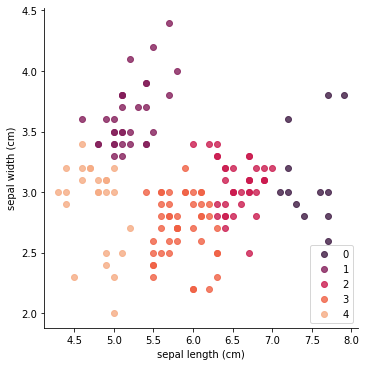

In [24]:
sns.lmplot( x='sepal length (cm)', y='sepal width (cm)', data=data_cluster, fit_reg=False, hue='clusters', legend=False, palette='rocket')
plt.legend(loc='lower right')

Если можно, есть несколько вопросов: 
1. Почему в материале лекции по этой теме для визуализации брались данные из обучающего набора а не из тестового и **y** тоже был не предсказанный, а обучающий? (plt.scatter(small_train['ash'], small_train['flavanoids'], c=sy_train)

2. Получается в итоге на визуализации, что мы видим не предсказанные данные, а данные из обучающего набора, только центры получились рассчитанными с помощью аппарата дискриминантной функции. Или я не правильно все поняла?

3. Не смогла разобраться самостоятельно как работает этот код, поясните, пожалуйста:

Z = lda_0_2.predict_proba(np.c_[xx.ravel(), yy.ravel()])  
Z = Z[:, 1].reshape(xx.shape)

и этот:

plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')   
(понятно только что строится какая-то трехмерная плоскость белого цвета и заданной ширины)

**Большое спасибо заранее!**